# Piezoelectric polarization due to dislocations in GaN

### Ref: Shi, C., Asbeck, P. M., & Yu, E. T. (1999). Piezoelectric polarization associated with dislocations in wurtzite GaN. Applied physics letters, 74(4), 573-575.

![alt text](disloc_image.png "Threading dislocations in GaN")

Picture directly taken from "Moram, M. A., et al. "On the origin of threading dislocations in GaN films." Journal of applied physics 106.7 (2009): 073513.

In [2]:
%%latex
\begin{equation}
    e = 
    \begin{pmatrix}
        0 & 0 & 0 & 0 & e_{15} & 0 \\
        0 & 0 & 0 & e_{15} & 0 & 0 \\
        e_{31} & e_{31} & e_{33} & 0 & 0 & 0
    \end{pmatrix}
\end{equation}

\begin{equation}
    S_s = \frac{b_s}{2\pi}\frac{1}{x^2+y^2}(0, 0, 0, x, y, 0)^T
\end{equation}

\begin{equation}
\mathbf{P}_s = e \times S_s = \frac{b_s e_{15}}{2\pi}\frac{1}{x^2+y^2}
    \begin{pmatrix}
        -y \\
         x \\
         0
    \end{pmatrix}
\end{equation}

\begin{equation}
    S_e = \frac{b_e}{4\pi}\frac{1}{(x^2+y^2)^2}\frac{1}{(1-\nu)}(\varepsilon_{11}, \varepsilon_{22}, 0, 0, \varepsilon_{13}, 0)^T
\end{equation}

\begin{equation}
\mathbf{P}_e = e \times S_e
\end{equation}

\begin{equation}
\mathbf{P}_{total} = \mathbf{P}_s + \mathbf{P}_e
\end{equation}

<IPython.core.display.Latex object>

In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib

In [4]:
def calc_strain_vector(dislocation_type, x, y, nu):
    strain_vector = np.zeros((6, 1))
    if dislocation_type == "screw":
        b = 5.13e-10
        prefactor = (b/(2.0*np.pi))*(1.0/(x**2 + y**2))
        strain_vector[3] = prefactor*x
        strain_vector[4] = prefactor*y
    elif dislocation_type == "edge":
        b = 3.16e-10
        prefactor = (b/(4.0*np.pi))*(1.0/(x**2 + y**2)**2)*(1.0/(1.0-nu))
        #print prefactor
        #r = 1.0/np.sqrt((x**2 + y**2))
        #theta = np.arctan(y/x)
        #prefactor = b/(4*np.pi*(1-nu)*r)
        strain_vector[0] = -prefactor*y*(((3.0*x**2)+(y**2))-(2.0*nu*(x**2+y**2)))
        #print strain_vector[0]
        strain_vector[1] = prefactor*y*((x**2 - y**2)-(2.0*nu*(x**2+y**2)))
        #print strain_vector[1]
        strain_vector[5] = prefactor*x*(x**2 - y**2)
        #print strain_vector[5]
        
        #e_cylindrical = np.zeros((3, 3))
        #convert strain vector to e_cylindrical
        #e_cartesian = np.matmul(T*e_cylindrical*T')
        #convert e_cartesian to strain_vector
        #transformation_matrix = np.array([np.cos(theta), -r*np.sin(theta), 0], 
        #                                 [np.sin(theta), r*np.cos(theta), 0], 
        #                                 [0, 0, 1])
    return strain_vector

In [5]:
def calc_piezoelectric_tensor(e15, e31, e33):
    e = np.zeros((3, 6))
    e[0][4] = e[1][3] = e15
    e[2][0] = e[2][1] = e31
    e[2][2] = e33
    return e

In [6]:
dislocation_type = "edge"
nu = 0.298
e15 = -0.42
e31 = -0.42
e33 = -0.84

nx = 10
ny = 10
xx_left = np.linspace(-1e-6, -1e-7, nx)
xx_right = np.linspace(1e-7, 1e-6, nx)
xx = np.concatenate((xx_left, xx_right))

yy_left = np.linspace(-1e-6, -1e-7, ny)
yy_right = np.linspace(1e-7, 1e-6, ny)
yy = np.concatenate((yy_left, yy_right))

In [7]:
e = calc_piezoelectric_tensor(e15, e31, e33)

P = np.zeros((len(xx), len(yy), 3))
for xi, x in enumerate(xx):
    for yi, y in enumerate(yy):
        strain_vector = calc_strain_vector(dislocation_type, x, y, nu)
        #print strain_vector
        #print np.matmul(e, strain_vector)[:, 0].shape
        P[xi, yi] = np.matmul(e, strain_vector)[:, 0]
        #print P

In [8]:
print e.shape, strain_vector.shape, P.shape

(3, 6) (6, 1) (20, 20, 3)


<IPython.core.display.Javascript object>


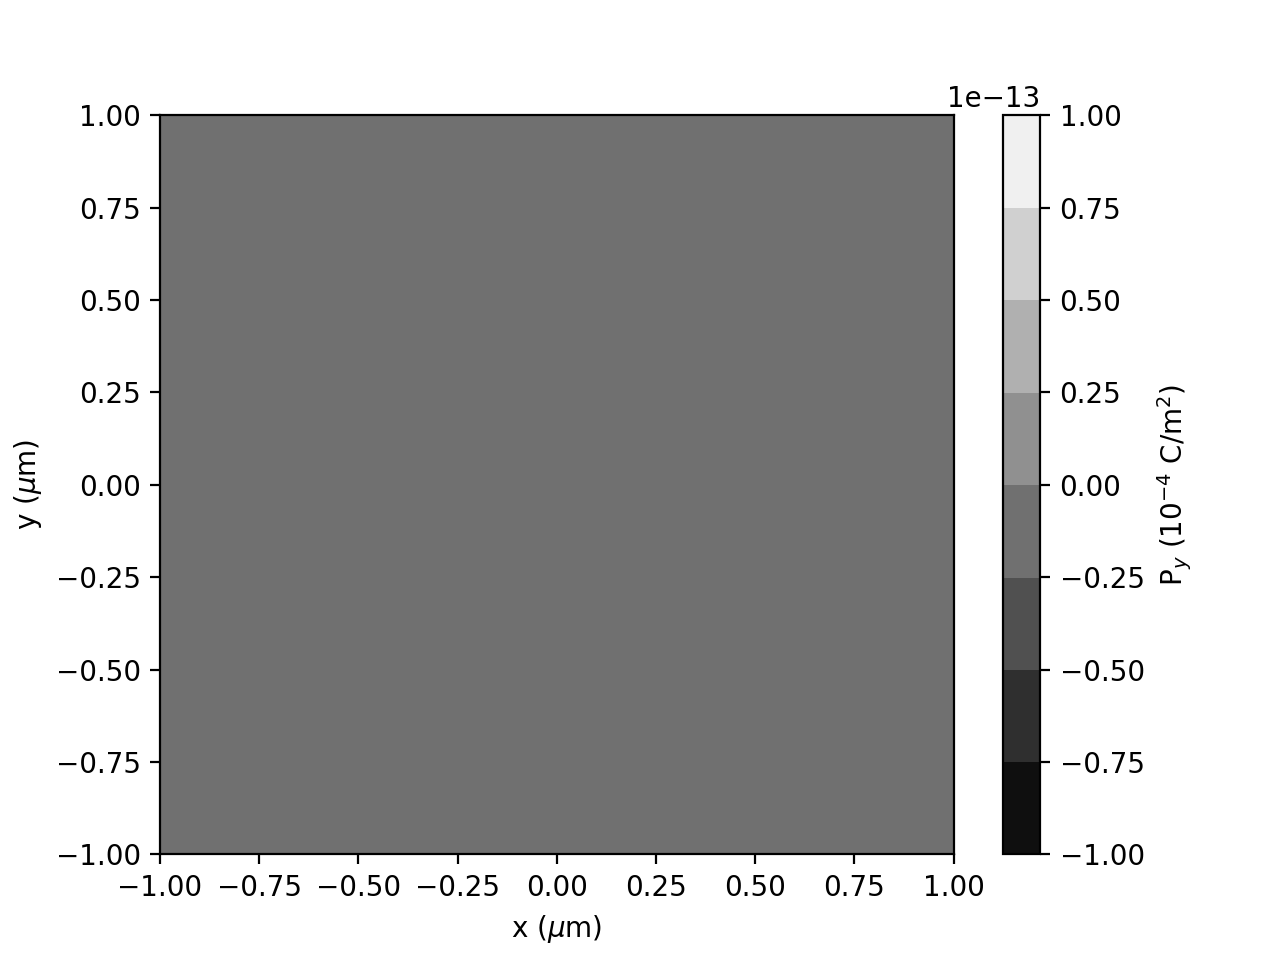

In [10]:
%matplotlib notebook
Px = P[:, :, 0]
Py = P[:, :, 1]
Pz = P[:, :, 2]
#print Px
f1 = np.sqrt(Px**2 + Py**2)*1e4
f = Py*1e4
cs = plt.contourf(xx*1e6, yy*1e6, f, cmap="gray")
cbar = plt.colorbar(cs)
cbar.set_label('P$_{y}$ (10$^{-4}$ C/m$^2$)')
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')

In [11]:
dislocation_type = "screw"

In [12]:
#e = calc_piezoelectric_tensor(e15, e31, e33)

P1 = np.zeros((len(xx), len(yy), 3))
for xi, x in enumerate(xx):
    for yi, y in enumerate(yy):
        strain_vector = calc_strain_vector(dislocation_type, x, y, nu)
        #print strain_vector
        #print np.matmul(e, strain_vector)[:, 0].shape
        P1[xi, yi] = np.matmul(e, strain_vector)[:, 0]
        #print P

<IPython.core.display.Javascript object>


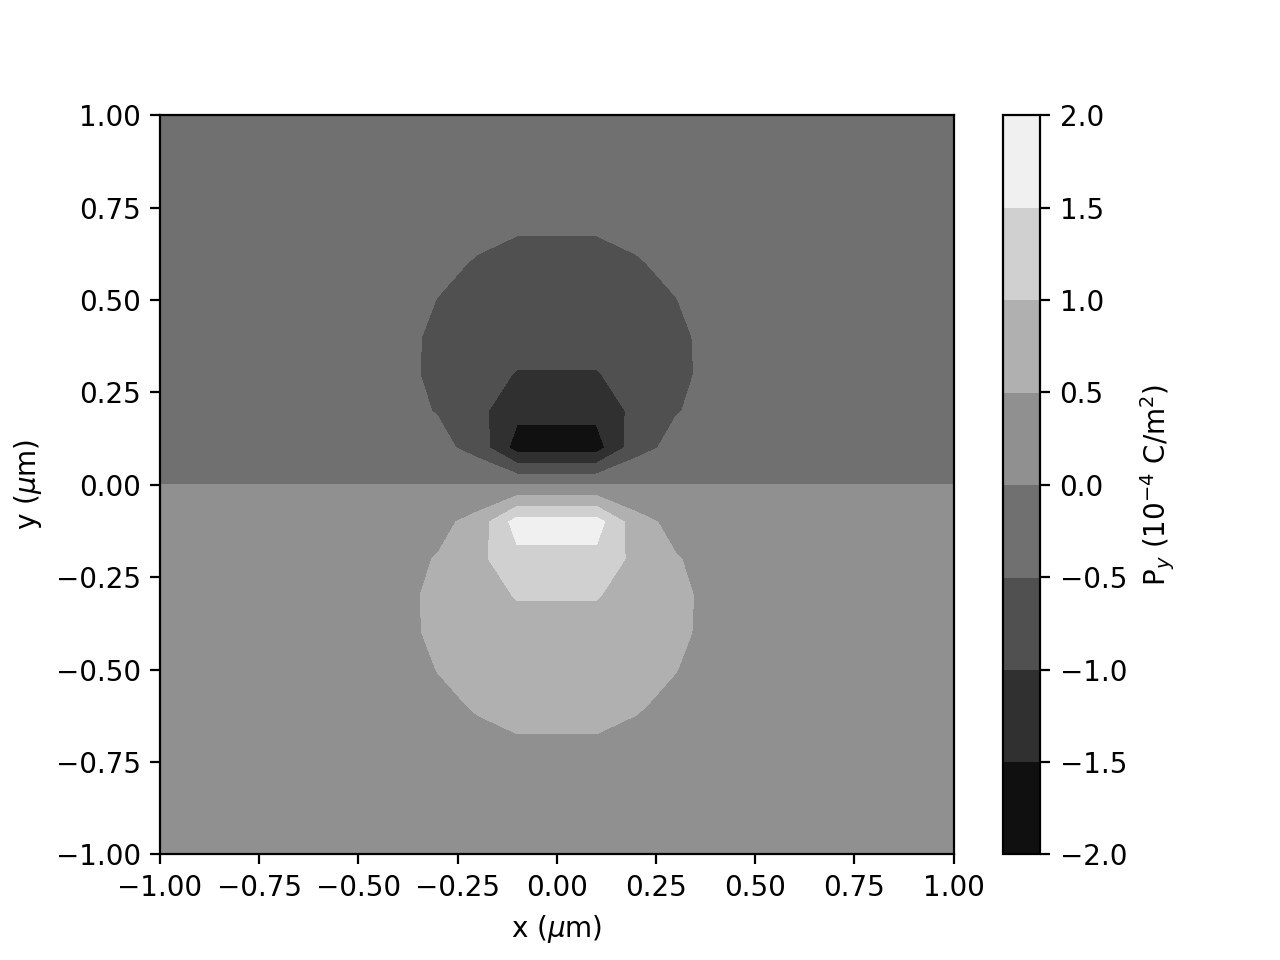

In [17]:
%matplotlib notebook
Px = P1[:, :, 0]
Py = P1[:, :, 1]
Pz = P1[:, :, 2]
#print Px
f1 = np.sqrt(Px**2 + Py**2)*1e4
f = Py*1e4
cs = plt.contourf(xx*1e6, yy*1e6, f, cmap="gray")
cbar = plt.colorbar(cs)
cbar.set_label('P$_{y}$ (10$^{-4}$ C/m$^2$)')
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')